In [164]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [165]:
#Import the API key 
from config import weather_api_key

In [166]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=69a158b24be20a1b4d6de749ec841818


In [167]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [168]:
#Import the request library
import requests

In [169]:
#Create a set of random latitude and longitude combinations
lats= np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs= np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs= zip(lats, lngs)
lat_lngs

In [170]:
from citipy import citipy

In [171]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [172]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [ ]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portobelo
Processing Record 2 of Set 1 | dalbandin
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | seymchan
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | roseburg
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | saint anthony
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | jishou
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | salinas
Processing Record 16 of Set 1 | yako
Processing Record 17 of Set 1 | road town
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | vardo
Processing Record 21 of Set 1 | rock sound
Processing Record 22 of Set 1 | hobart
Processing Record 23 of S

In [185]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Portobelo,9.5500,-79.6500,78.12,85,100,7.00,PA,2022-11-08 16:15:35
1,Dalbandin,28.8947,64.4101,68.00,44,45,7.47,PK,2022-11-08 16:15:36
2,Port Lincoln,-34.7333,135.8667,71.74,53,85,19.75,AU,2022-11-08 16:15:36
3,Saldanha,-33.0117,17.9442,62.51,72,94,14.88,ZA,2022-11-08 16:15:36
4,Seymchan,62.8833,152.4333,-6.27,91,100,6.02,RU,2022-11-08 16:15:37
5,Chuy,-33.6971,-53.4616,68.63,55,0,11.90,UY,2022-11-08 16:15:37
6,Roseburg,43.2165,-123.3417,40.75,94,100,4.61,US,2022-11-08 16:12:04
7,Vaini,-21.2000,-175.2000,75.36,73,75,8.05,TO,2022-11-08 16:15:38
8,Saint Anthony,45.0205,-93.2180,43.86,67,100,20.71,US,2022-11-08 16:15:38
9,Qaanaaq,77.4840,-69.3632,-6.63,76,75,7.85,GL,2022-11-08 16:15:38


In [187]:
#reorder column
new_column_order =["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Portobelo,PA,2022-11-08 16:15:35,9.5500,-79.6500,78.12,85,100,7.00
1,Dalbandin,PK,2022-11-08 16:15:36,28.8947,64.4101,68.00,44,45,7.47
2,Port Lincoln,AU,2022-11-08 16:15:36,-34.7333,135.8667,71.74,53,85,19.75
3,Saldanha,ZA,2022-11-08 16:15:36,-33.0117,17.9442,62.51,72,94,14.88
4,Seymchan,RU,2022-11-08 16:15:37,62.8833,152.4333,-6.27,91,100,6.02
5,Chuy,UY,2022-11-08 16:15:37,-33.6971,-53.4616,68.63,55,0,11.90
6,Roseburg,US,2022-11-08 16:12:04,43.2165,-123.3417,40.75,94,100,4.61
7,Vaini,TO,2022-11-08 16:15:38,-21.2000,-175.2000,75.36,73,75,8.05
8,Saint Anthony,US,2022-11-08 16:15:38,45.0205,-93.2180,43.86,67,100,20.71
9,Qaanaaq,GL,2022-11-08 16:15:38,77.4840,-69.3632,-6.63,76,75,7.85


In [190]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [189]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

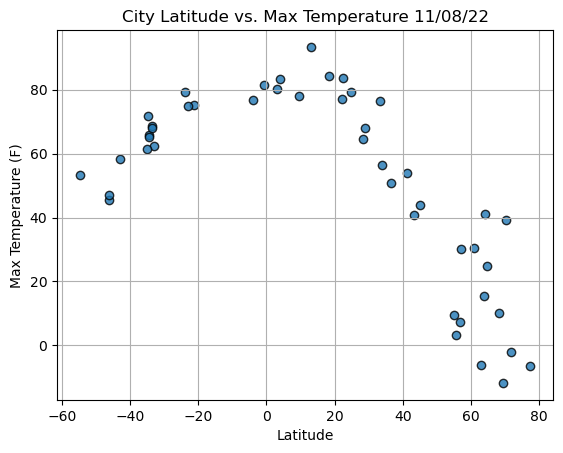

In [191]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

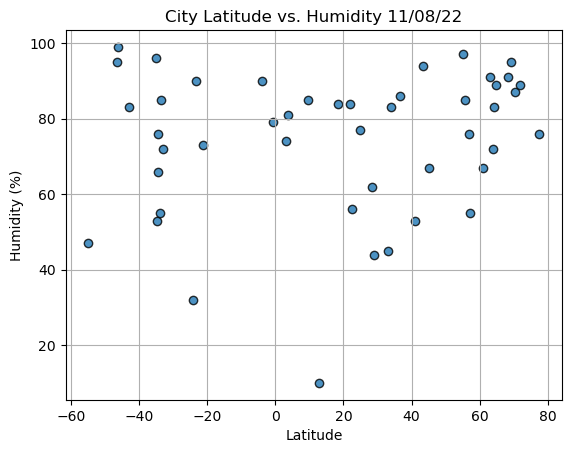

In [192]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

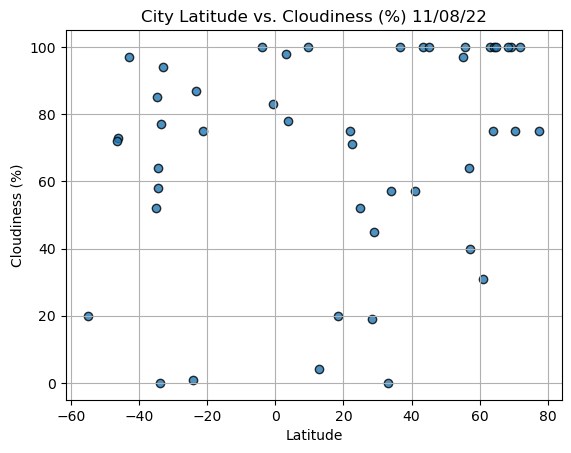

In [194]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

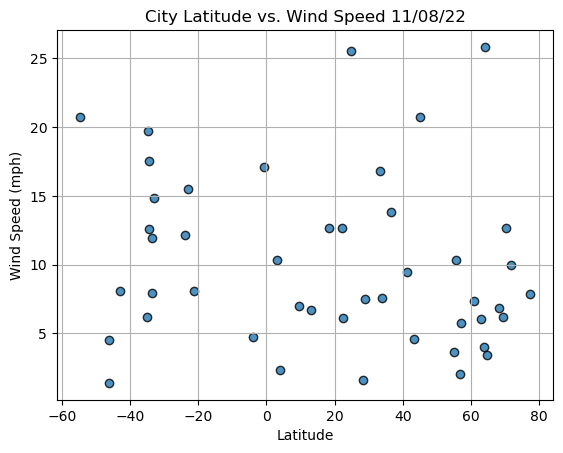

In [195]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()